In [25]:
%load_ext autoreload
%autoreload 2

#import sys
import pandas
#sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt

datadir0  = '/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/'
plotsdir  = '//Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Plots/'
clrs = ["black","#c239e8","#1f78b4","#b2df8a","#33a02c"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/NoRemodel_Xstretch100/thermo_seed1.dat
ff 0 len(StressAv) 50000 len(Time) 50000 Time[-1] 21284740
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/NoRemodel_Xstretch100/thermo_seed2.dat
ff 0 len(StressAv) 50000 len(Time) 50000 Time[-1] 21284740
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/NoRemodel_Xstretch100/thermo_seed3.dat
ff 0 len(StressAv) 50000 len(Time) 50000 Time[-1] 21284740
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/NoRemodel_Xstretch100/thermo_seed4.dat
ff 0 len(StressAv) 50000 len(Time) 50000 Time[-1] 21284740
/Users/billiemeadowcroft/Dropbox/Collagen/NargessPlotting/GithubCode/Figures/FigAlignment/Data/NoRemodel_Xstretch100/thermo_seed5.dat
ff 0 len(StressAv) 50000 len(Time) 50000 Time[-1] 21284740
/Users/billiemeadowcroft/Dropbox/Co

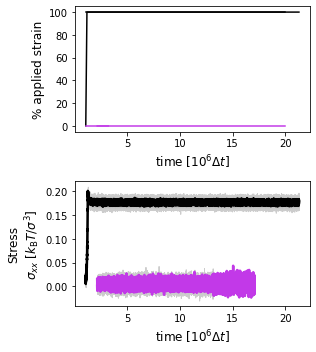

In [38]:
NumMolecules=15680
folderhandles = ['NoRemodel_Xstretch100/','NoStretch/']
seeds = "1 2 3 4 5".split()
fig,ax= plt.subplots(2,1,figsize = (4.5,5))
fs2 = 12
TEq = 1085000
Vol = 164*164*12
TStretch = 1e5


for ff in range(2):
    StressAll = []
    Times = []
    folderhandle = folderhandles[ff]
    if ff == 0:
        seeds = "1 2 3 4 5".split()
        strain=1
    if ff == 1:
        seeds = "1 2 3".split()
        strain=0
    for s in range(len(seeds)):
        VolTime = []
        name = "thermo_seed"+seeds[s]+".dat"
        datafolder = datadir0+folderhandle+name
        thermo = pandas.read_csv(datafolder, sep = ' ', header = 'infer')
        print(datafolder)
        stressX = thermo.stressX
        stressX = stressX.values
        Time = thermo.step
        Time = Time.values
        #frame[ff] = Time[1]-Time[0]
        #print(frame[ff])
        for t in range(len(Time)):
            if Time[t] <= TEq:
                VolTime.append(Vol)
            if Time[t] > TEq and Time[t] <= TEq+TStretch:
                VolTime.append(Vol+Vol*strain*((Time[t]-TEq)/TStretch))
            if Time[t] > TEq+TStretch:
                VolTime.append((1+strain)*Vol)
        stressxAv = np.divide(stressX,VolTime)
        StressAll.append(stressxAv)
        Times.append(Time)
        print("ff",ff,"len(StressAv)",len(stressxAv),"len(Time)",len(Time),'Time[-1]',Time[-1])
        
        #ax[1].plot(np.divide(Time,1e6),stressxAv,alpha = 0.2,color = clrs[s])
        if s == 0:
            if ff == 1:
                ax[0].plot(np.divide(Time,0.5e6),np.divide(np.subtract(VolTime,Vol),Vol/100),color = clrs[ff])
            else:
                ax[0].plot(np.divide(Time,1e6),np.divide(np.subtract(VolTime,Vol),Vol/100),color = clrs[ff])
    # Create a masked array to handle variable-length data
    max_len = max(len(arr) for arr in StressAll)
    longest_idx = np.argmax([len(arr) for arr in StressAll])
    masked = np.ma.empty((len(StressAll), max_len))
    Time = Times[longest_idx]
    masked.mask = True  # mask everything by default

    # Fill in available data for each array
    for i, arr in enumerate(StressAll):
        masked[i, :len(arr)] = arr
        masked.mask[i, :len(arr)] = False  # unmask valid entries
    
    stressAvAv = masked.mean(axis=0).filled(np.nan) #np.mean(StressAll,axis=0)
    stressStd = masked.std(axis=0).filled(np.nan) #np.std(StressAll,axis=0)
    if ff == 1:
        
        ax[1].plot(np.divide(Time,0.5e6),stressAvAv,color = clrs[ff],linewidth = 2.5,label = folderhandle)
        ax[1].fill_between(np.divide(Time,0.5e6),np.subtract(stressAvAv,stressStd),np.add(stressAvAv,stressStd),color = clrs[0],alpha = 0.2)
    else:
        ax[1].plot(np.divide(Time,1e6),stressAvAv,color = clrs[ff],linewidth = 2.5,label = folderhandle)
        ax[1].fill_between(np.divide(Time,1e6),np.subtract(stressAvAv,stressStd),np.add(stressAvAv,stressStd),color = clrs[0],alpha = 0.2)
ax[0].plot([1.08,20],[100,100],color = clrs[0])
ax[0].plot([1.08,20],[0,0],color = clrs[1])
ax[1].set_ylabel('Stress\n'+r"$\sigma_{xx} ~[k_{\mathrm{B}}T/\sigma^{3}$]",fontsize =fs2)
ax[0].set_ylabel("% applied strain",fontsize =fs2)

ax[1].set_xlabel(r"time [$10^6\Delta t$]",fontsize =fs2)

ax[0].set_xlabel(r"time [$10^6\Delta t$]",fontsize =fs2)

fig.tight_layout()

Molecule alignment

Text(0, 0.5, 'Alignment, $\\langle cos^{2}(\\theta)\\rangle$')

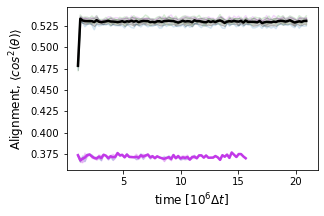

In [ ]:
fig,ax= plt.subplots(1,figsize = (4.5,3))
frame = 202000

for ff in range(2):
    Times = []
    MolTot = []
    folderhandle = folderhandles[ff]
    if ff == 0:
        seeds = "1 2 3 4 5".split()
    if ff == 1:
        seeds = "1 2 3".split()
    for s in range(len(seeds)):
        name = "MolAlignrun_seed"+seeds[s]
        tEq_add = 0
        tEq_add = TEq
        summingtSq=[]
        datafolder = datadir0+folderhandle+name+'.txt'
        dotX_ = pandas.read_csv(datafolder, sep = ' ', usecols = [0], header =None)
        timesteps1 = int((len(dotX_))/(NumMolecules+1))
        dotX__ = np.reshape(dotX_.values,(timesteps1,-1))
        dotX = dotX__ [:,1:]
        dotXF = np.abs(dotX.astype(float))
        time = []
        for t in range(timesteps1-1):
            time.append(np.add(np.multiply(t,int(frame)),tEq_add))
            summingtSq.append((np.sum(np.multiply(dotXF[t],dotXF[t]))/NumMolecules))
        ax.plot(np.divide(time,1e6),summingtSq,color = clrs[s],alpha = 0.2)
        MolTot.append(summingtSq)
        Times.append(time)
    max_len = max(len(arr) for arr in MolTot)
    longest_idx = np.argmax([len(arr) for arr in MolTot])
    masked = np.ma.empty((len(MolTot), max_len))
    Time = Times[longest_idx]
    masked.mask = True  # mask everything by default

    # Fill in available data for each array
    for i, arr in enumerate(MolTot):
        masked[i, :len(arr)] = arr
        masked.mask[i, :len(arr)] = False  # unmask valid entries

    MolTotAv = masked.mean(axis=0).filled(np.nan) 
    MolTotStd = masked.std(axis=0).filled(np.nan)
    time = Times[longest_idx]
    ax.plot(np.divide(time,1e6),MolTotAv,color = clrs[ff],linewidth = 2.5,label = 'Average')
    ax.fill_between(np.divide(time,1e6),np.subtract(MolTotAv,MolTotStd),np.add(MolTotAv,MolTotStd),color = clrs[ff],alpha = 0.2,label = 'Standard deviation')

ax.set_xlabel(r"time [$10^6\Delta t$]",fontsize =fs2)
ax.set_ylabel(r'Alignment, $\langle cos^{2}(\theta)\rangle$',fontsize =fs2)
